In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from joblib import load
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Loading dataset and saved model
sms_dataset = pd.read_csv("../dataset/SMSSpamCollection", sep='\t', names=['Labels', 'Text'])
loaded_model = load("../models/sms-spam-classifier.joblib")
vectorizer = load("../models/vectorizer.joblib")

In [3]:
# Splitting data
x = sms_dataset['Text']
y = sms_dataset['Labels']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalizing test data to check prediction correctness
x_test_vector = vectorizer.transform(x_test)

In [4]:
# Setting up Confusion Matrix
y_pred = loaded_model.predict(x_test_vector)
cm = confusion_matrix(y_test, y_pred) # Dataset

In [5]:
# Checking class order
print(loaded_model.classes_)


['ham' 'spam']


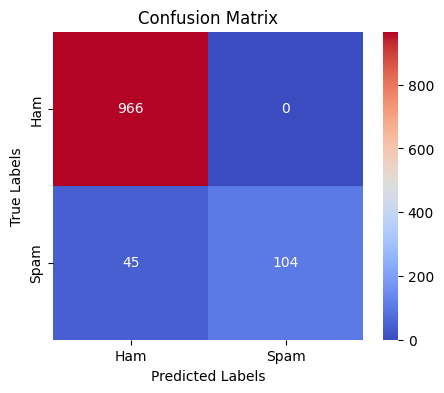

In [29]:
# Setting up heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, fmt='d', annot=True, cmap='coolwarm', yticklabels=['Ham', 'Spam'], xticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Saving heatmap
plt.savefig("Confusion-Matrix",  dpi=300)
plt.show()


In [24]:
# Extracting features' index
features_weight = loaded_model.coef_[0] # 1D array

# Ordering weights in ascending order
indexes = np.argsort(features_weight)
top_indexes = indexes[-10:]

# Getting features (words) that lead to a positive categorization (spam)
feature_names = vectorizer.get_feature_names_out()
top_spam_words = feature_names[top_indexes]

# Getting corresponding weights
top_weights = features_weight[top_indexes]

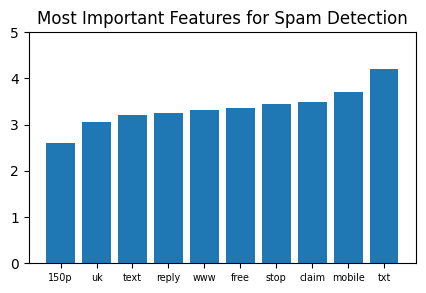

In [30]:
# Setting up bar plot
plt.figure(figsize=(5,3))
plt.bar(top_spam_words, top_weights)
plt.title("Most Important Features for Spam Detection")
plt.xticks(top_spam_words, size='x-small')
plt.yticks([0, 1, 2, 3, 4, 5])

# Saving bar plot
plt.savefig("Most-Important-Features-for-Spam-Detection", dpi=300)
plt.show()